# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Achmad Dzaky Ramadhani
- **Email:** achmad.dzaky48@gmail.com
- **ID Dicoding:** dzaky1305

## Menentukan Pertanyaan Bisnis

- Bagaimana korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda harian ?

- Apakah ada pola yang dapat diidentifikasi, seperti penurunan dalam penyewaan sepeda saat terjadi hujan atau kondisi cuaca buruk lainnya?

- Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [253]:
import pandas as pd

# URL GitHub raw data
url = 'https://raw.githubusercontent.com/feverlash/Analisis-Data/d3ebcff8ad430d6c486b4c30ed771084dfaa383d/Bike-sharing-dataset/day.csv'

# Membaca data dari URL
data = pd.read_csv(url)

# Menampilkan beberapa baris pertama dari DataFrame
print("Data Harian:")
data.head()

Data Harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

####Mendeteksi Missing Values dan Duplicate Data

In [192]:
#1. Mendeteksi Missing Values
print("\nMissing Value:")
data.isnull().sum()

#2. Mendeteksi Duplicate Data
print("\nDuplicate Data:")
data.duplicated().sum()


Missing Value:

Duplicate Data:


0

####Mencari outlier untuk variabel temp, atemp, hum, windspeed, casual, registered, dan cnt.

In [193]:
# Memilih kolom yang ingin dianalisis untuk outlier
columns_to_analyze = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Mencari outlier untuk setiap kolom
outliers = {}
for column in columns_to_analyze:
    q25, q75 = np.percentile(data[column], 25), np.percentile(data[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower_bound, upper_bound = q25 - cut_off, q75 + cut_off

    # Mengidentifikasi outlier
    outlier_indices = np.where((data[column] < lower_bound) | (data[column] > upper_bound))
    outliers[column] = outlier_indices[0]

# Menampilkan outlier untuk setiap kolom
for column, outlier_index in outliers.items():
    print("Outlier pada kolom", column, ":", outlier_index)

Outlier pada kolom temp : []
Outlier pada kolom atemp : []
Outlier pada kolom hum : [49 68]
Outlier pada kolom windspeed : [ 44  49  93  94 292 382 407 420 432 433 450 666 721]
Outlier pada kolom casual : [148 183 184 196 246 281 441 447 455 456 462 469 470 476 490 497 504 505
 511 512 513 518 519 525 532 533 539 540 550 560 568 581 595 609 610 617
 623 630 631 637 644 658 665 680]
Outlier pada kolom registered : []
Outlier pada kolom cnt : []


Dari hasil assessing data, diperoleh bahwa:

- Tidak ada missing values pada dataset.
- Tidak ada duplicate pada dataset.
- Terdapat outliers pada dataset.

### Cleaning Data

####Melakukan dropping pada setiap outlier

In [223]:
# Menggabungkan semua indeks outlier menjadi satu set
all_outliers = set()
for column, outlier_index in outliers.items():
    all_outliers.update(outlier_index)

# Menjatuhkan baris yang mengandung outlier
data_cleaned = data.drop(index=list(all_outliers))

# Menyimpan DataFrame yang sudah dibersihkan ke dalam file CSV
data_cleaned.to_csv('/content/Bike Sharing Dataset/cleaned_day.csv', index=False)

data_cleaned.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Eksplorasi Dataset Harian

In [251]:
# URL GitHub raw data
url = 'https://raw.githubusercontent.com/feverlash/Analisis-Data/d4f2afc8974492315841fd0f7120133dd50bfb8c/Bike-sharing-dataset/cleaned_day.csv'

# Membaca data yang sudah dibersihkan
data = pd.read_csv(url)

# Menampilkan beberapa baris pertama dari DataFrame
print("\nParameter statistik dari dataset harian")
data.describe(include="all")


Parameter statistik dari dataset harian


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,673.000000,673,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
unique,NaN,673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,357.989599,NaN,2.503715,0.475483,6.557207,0.026746,2.962853,0.728083,1.404160,0.489420,0.469105,0.632846,0.186662,738.934621,3628.787519,4367.722140
std,212.108768,NaN,1.123505,0.499770,3.505108,0.161460,1.927276,0.445278,0.548358,0.185105,0.164610,0.140467,0.072436,523.019213,1578.680984,1863.248953
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.000000,20.000000,22.000000
25%,175.000000,NaN,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.329167,0.326379,0.524583,0.134329,304.000000,2482.000000,3068.000000
50%,349.000000,NaN,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.484167,0.470950,0.630833,0.178479,678.000000,3614.000000,4401.000000
75%,545.000000,NaN,4.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.653333,0.607958,0.734583,0.230725,1031.000000,4709.000000,5633.000000


####Mencari Korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda harian.

In [225]:
#Korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda harian
weather_correlation = data[['weathersit', 'cnt']].corr()
print("Korelasi antara kondisi cuaca dan jumlah penyewaan sepeda harian:")
data[['weathersit', 'cnt']].corr()

Korelasi antara kondisi cuaca dan jumlah penyewaan sepeda harian:


,weathersit,cnt
weathersit,1.000000,-0.302539
cnt,-0.302539,1.000000


####Menghitung jumlah penyewaan sepeda berdasarkan kondisi cuaca

In [252]:
# Menghitung jumlah penyewaan sepeda berdasarkan kondisi cuaca
weather_counts = data['weathersit'].value_counts().reset_index()
weather_counts.columns = ['Weather Situation', 'Counts']

data['weathersit'].value_counts().reset_index()

,index,weathersit
0,1,421
1,2,232
2,3,20


####Menghitung jumlah penyewaan sepeda berdasarkan hari kerja.

In [244]:
# Menghitung jumlah penyewaan sepeda berdasarkan workingday
workingday_counts = data['workingday'].value_counts().reset_index()
workingday_counts.columns = ['Working Day', 'Counts']

data['workingday'].value_counts().reset_index()

,index,workingday
0,1,500
1,0,231


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda harian ?

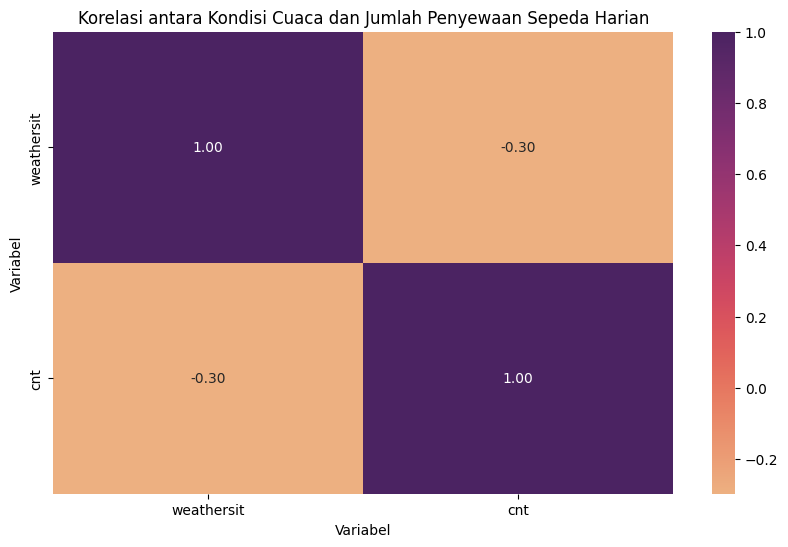

In [255]:
# Memvisualisasikan korelasi antara variabel kondisi cuaca dan jumlah penyewaan sepeda harian
plt.figure(figsize=(10, 6))
corr_matrix = data[['weathersit', 'cnt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Korelasi antara Kondisi Cuaca dan Jumlah Penyewaan Sepeda Harian')
plt.xlabel('Variabel')
plt.ylabel('Variabel')
plt.show()

### Pertanyaan 2: Apakah ada pola yang dapat diidentifikasi dalam penyewaan sepeda saat terjadi hujan atau kondisi cuaca buruk lainnya?

<ipython-input-245-34e665330fb4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather Situation', y='Counts', data=weather_counts, palette='flare')


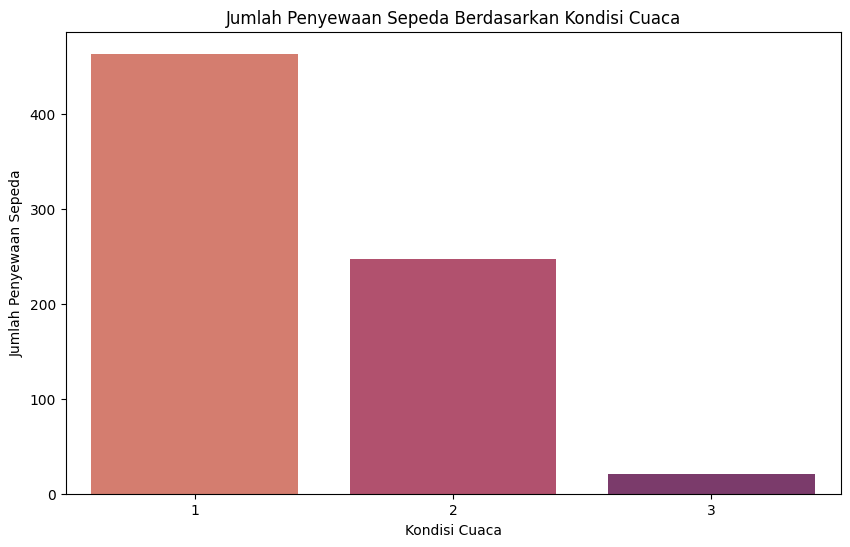

In [245]:
# Memvisualisasikan jumlah penyewaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather Situation', y='Counts', data=weather_counts, palette='flare')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

###Pertanyaan 3: Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan hari libur?

<ipython-input-242-be53726696a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Working Day', y='Counts', data=workingday_counts, palette='flare')


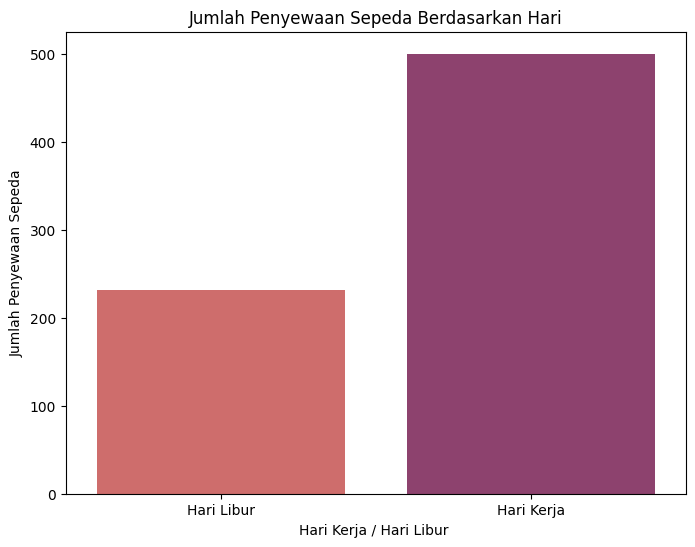

In [242]:
# Memvisualisasikan jumlah penyewaan sepeda berdasarkan workingday
plt.figure(figsize=(8, 6))
sns.barplot(x='Working Day', y='Counts', data=workingday_counts, palette='flare')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari Kerja / Hari Libur ')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Hari Libur', 'Hari Kerja'])
plt.show()

## Conclusion

- Conclution pertanyaan 1

Korelasi yang negatif menunjukkan bahwa semakin buruk kondisi cuaca, semakin sedikit jumlah penyewaan sepeda harian yang terjadi. Hal ini masuk akal, karena cuaca yang buruk seperti hujan atau salju cenderung membuat orang kurang tertarik untuk menggunakan sepeda. Meskipun korelasinya cukup lemah (-0.302539), namun masih cukup signifikan untuk diperhatikan.

- Conclution pertanyaan 2

Jumlah penyewaan sepeda cenderung lebih tinggi pada cuaca cerah dibandingkan dengan cuaca berawan atau cuaca hujan/salju.
Orang cenderung lebih memilih untuk menyewa sepeda saat cuaca cerah karena kondisi cuaca yang baik membuat mereka lebih nyaman untuk bersepeda.
Pengelola layanan penyewaan sepeda dapat mempertimbangkan untuk meningkatkan promosi atau layanan spesifik saat cuaca cerah untuk meningkatkan penggunaan sepeda.

- Conclution pertanyaan 3

Jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja daripada pada hari libur.
Hal ini mungkin disebabkan oleh kebiasaan sehari-hari masyarakat yang lebih sering menggunakan sepeda pada saat bekerja atau melakukan aktivitas sehari-hari daripada pada saat libur.
Informasi ini dapat membantu dalam perencanaan layanan atau promosi yang lebih tepat sasaran berdasarkan pola penggunaan sepeda pada hari kerja dan hari libur.